# Another Step Size 
4/11/2016
This notebook will be used to again explore how to choose a step size.
The goal of this notebook is provide a clearer understanding of the 
effect of step size compared to the previous notebook.  In that effect,
this notebook will use a larger, realistic dataset and will use simpler
calculations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ml_helpers.regression as reg
import ml_helpers.graph as mlg
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./kc_house_data.csv')

We will explore the effect of square feet on price.  To better understand what
our data looks like, we will graph it below.

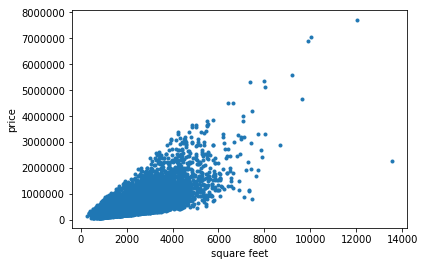

In [3]:
plt.plot(df.sqft_living, df.price, '.')
plt.xlabel('square feet')
plt.ylabel('price')
plt.show()

Split the data into a training set and a test set and generate feature matrix. 
For simplicity we will assume a simple linear relationship between the independant
and dependant variables.

In [4]:
train, test = train_test_split(df, test_size=0.2)

In [5]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 1)
train_output = train.price

Now we will define a single iteration of gradient descent

In [6]:
def gradient_descent_single_step(output, features, weights, step):
    partial = reg.get_rss_partial(output, features, weights)
    return weights - step * partial, partial

# Plotting the learning curve for simple linear regression

Define a function that calculates how the magnitude of the partial derivative changes over a fixed set of steps.  The magnitude of the partial is an indicator of how close the current function is to convergence at the minimum.

In [7]:
def get_curve(output, features, weights, step, iterations):
    weights_temp = weights.copy()
    magnitude = []
    for x in xrange(iterations):
        weights_temp, partial = gradient_descent_single_step(output, features, weights_temp, step)
        magnitude.append(np.linalg.norm(partial))
    return magnitude

Plot the learning curves for a number of different step sizes.

In [8]:
iterations = 50
step_size = np.logspace(-11, -13, 10)
step_size

array([  1.00000000e-11,   5.99484250e-12,   3.59381366e-12,
         2.15443469e-12,   1.29154967e-12,   7.74263683e-13,
         4.64158883e-13,   2.78255940e-13,   1.66810054e-13,
         1.00000000e-13])

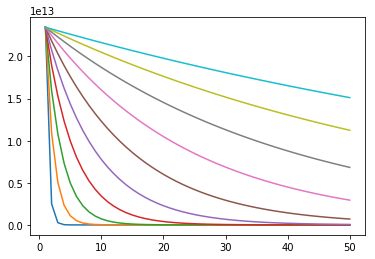

In [9]:
for step in step_size:
    learning_curve  = get_curve(train_output, train_feat, weights, step, iterations)
    plt.plot(np.arange(1, iterations+1, 1), learning_curve)
plt.show()

In [10]:
def plot_learning_curve(output, features, weights, step_size, iterations):
    for step in step_size:
        learning_curve  = get_curve(train_output, train_feat, weights, step, iterations)
        plt.plot(np.arange(1, iterations+1, 1), learning_curve)
    plt.title('Learning Curve')
    plt.show()

Train the regression line on the training data using the fastest converging step size.

In [11]:
model = weights.copy()
for x in xrange(10):
    model, partial = gradient_descent_single_step(train_output, train_feat, model, step_size[0])

Plot the model against the test data.

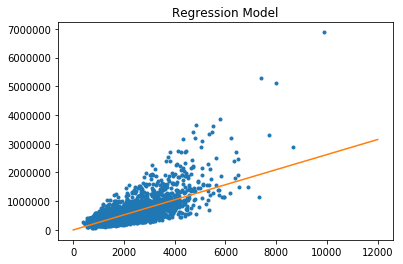

In [12]:
def eval_model(model, data):
    plt.plot(data.sqft_living, data.price, '.')
    mlg.add_to_plot(model, start=0, end=12000)
    plt.title('Regression Model')
    plt.show()
eval_model(model, test)

## Polynomial regression
We will not attempt the same exploration except using different polynomial models.

In [13]:
def plot_regression(output, features, weights, data, step_size, iterations):
    plot_learning_curve(output,features, weights, step_size, iterations)
    model = weights.copy()
    for x in xrange(iterations):
        model, partial = gradient_descent_single_step(output, features, model, step_size[0])
    eval_model(model, data)
    return model

Degree 2

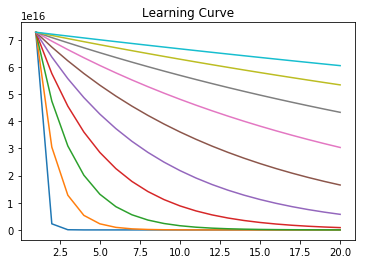

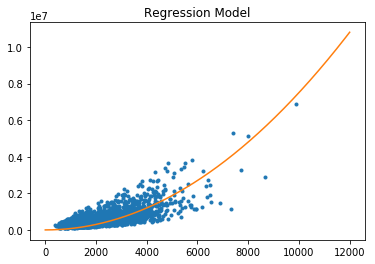

array([  5.94931419e-08,   9.01335738e-05,   7.50795921e-02])

In [14]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 2)
plot_regression(train_output, train_feat, weights, test, np.logspace(-18, -20, 10), 20)

Degree 3

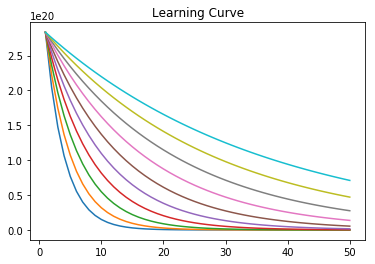

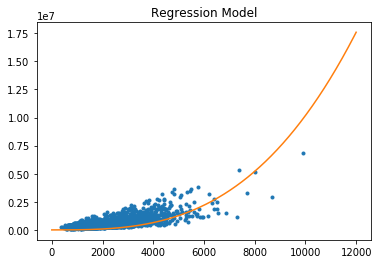

array([  3.41321365e-15,   7.15504462e-12,   1.51180214e-08,
         1.01777824e-05])

In [15]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 3)
plot_regression(train_output, train_feat, weights, test, np.logspace(-26, -27, 10), 50)

Degree 4

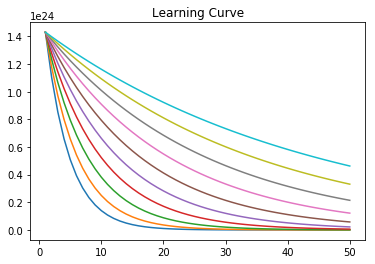

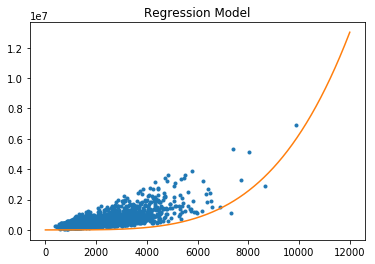

array([  4.39323708e-23,   1.04430874e-19,   2.83978629e-16,
         7.66099481e-13,   6.28057906e-10])

In [21]:
train_feat, weights = reg.gen_predicted(train.sqft_living.values, 4)
plot_regression(train_output, train_feat, weights, test, np.logspace(-34, -35, 10), 50)